# Language Analysis: Venezuela
Analyzing the language of **accounts and tweets** identified by Twitter to be associated with the country's information operations.

In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import langdetect
from collections import Counter
import iso639 as pylang

## Tweet Language Summary

In [7]:
filename_one = '../Data/venezuela_201901_1_tweets_csv_hashed.csv'
filename_two = '../Data/venezuela_201901_2_tweets_csv_hashed.csv'

In [8]:
# Import dataset 1
venezuela_one = pd.read_csv(filename_one, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})

In [9]:
# Import dataset 2
venezuela_two = pd.read_csv(filename_two, dtype = {
    "tweetid": str,
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
    "tweet_text": str,
    "tweet_time": str,
    "tweet_client_name": str,
    "in_reply_to_tweetid": str,
    "in_reply_to_userid": str,
    "quoted_tweet_tweetid": str,
    "is_retweet": bool,
    "retweet_userid": str,
    "retweet_tweetid": str,
    "latitude": str,
    "longitude": str,
    "quote_count": str,
    "reply_count": str,
    "like_count": str,
    "retweet_count": str,
    "hashtags": str,
    "urls": str,
    "user_mentions": str,
    "poll_choices": str,
})

In [10]:
# Combine datasets
ven_datasets = [venezuela_one, venezuela_two]
ven = pd.concat(ven_datasets)

In [12]:
print(len(ven))

9946768


In [13]:
ven.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_text', 'tweet_time',
       'tweet_client_name', 'in_reply_to_tweetid', 'in_reply_to_userid',
       'quoted_tweet_tweetid', 'is_retweet', 'retweet_userid',
       'retweet_tweetid', 'latitude', 'longitude', 'quote_count',
       'reply_count', 'like_count', 'retweet_count', 'hashtags', 'urls',
       'user_mentions', 'poll_choices'],
      dtype='object')

In [53]:
# Sample data of tweets / their detected language
for elem in ven.head(5)['tweet_text']:
    print(elem)
    print(langdetect.detect(elem))
    print()

Conozca cuál será el primer país inhabitable por culpa del cambio climático (+capitalismo) https://t.co/8FS6WCyky1 https://t.co/n0bv4I4UJ8
es

La canciller china dio una rueda de prensa en respuesta a las últimas declaraciones de la Administración Trump  https://t.co/hVXgJmy53M
es

Ministro de Brasil implicado en casos de corrupción renunció y se reunió con Borges - https://t.co/8OLhCV8aBg https://t.co/IdhFEqCMIe
es

Frustran un suicidio colectivo en varios países orquestado por un joven de 17 años https://t.co/oYX5xLid6r https://t.co/Q7QOhaONN1
es

'The Nation': Las Fuerzas Armadas de EE.UU. no pueden ser denominadas las mejores del mundo … https://t.co/OuY3cVXft3
es



In [84]:
# Detect language of tweets & store in a list
# Only do first 10,000 for Milestone 1
tweet_languages = []
for tweet_text in ven.head(10000)['tweet_text']:
    lang = langdetect.detect(elem)
    tweet_languages.append(lang)

In [85]:
# Get counts of each language
tweet_languages_count = Counter(tweet_languages)
print(tweet_languages_count)

Counter({'fr': 10000})


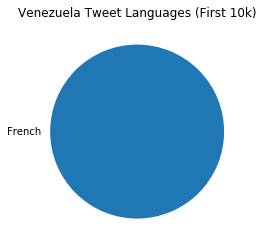

In [87]:
# Plot language counts
tweet_lang_types = []
tweet_lang_counts = []
for lang in tweet_languages_count:
    tweet_lang_types.append(lang)
    count = tweet_languages_count[lang]
    tweet_lang_counts.append(count)

tweet_lang_types_long = []
for lang in tweet_lang_types:
    lang_long = pylang.languages.get(alpha2 = lang).name
    tweet_lang_types_long.append(lang_long)
    
pyplot.pie(tweet_lang_counts, labels = tweet_lang_types_long)
pyplot.title('Venezuela Tweet Languages (First 10k)')
pyplot.show()

## Account Language Summary

In [69]:
accounts_filename_one = '../Data/venezuela_201901_1_users_csv_hashed.csv'
accounts_filename_two = '../Data/venezuela_201901_2_users_csv_hashed.csv'

# Import datasets
venezuela_accounts_one = pd.read_csv(accounts_filename_one, dtype = {
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
})
venezuela_accounts_two = pd.read_csv(accounts_filename_two, dtype = {
    "userid": str,
    "user_display_name": str,
    "user_screen_name": str,
    "user_reported_location": str,
    "user_profile_description": str,
    "user_profile_url": str,
    "follower_count": str,
    "following_count": str,
    "account_creation_date": str,
    "account_language": str,
})

In [70]:
# Combine datasets
ven_account_datasets = [venezuela_accounts_one, venezuela_accounts_two]
ven_users = pd.concat(ven_account_datasets)
print(len(ven_users))

1951


In [71]:
ven_users.columns

Index(['userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language'],
      dtype='object')

In [72]:
# Sample data of account languages
for elem in ven_users.head(5)['account_language']:
    print(elem)

es
es
es
es
es


In [73]:
# Get counts of each language
languages_count = Counter(ven_users['account_language'])
print(languages_count)

Counter({'es': 1886, 'en': 64, 'pt': 1})


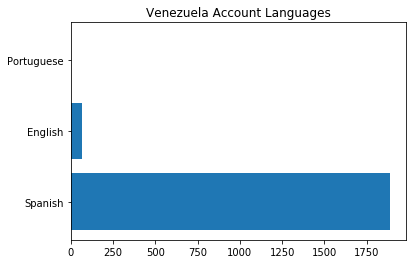

In [79]:
# Plot language counts
lang_types = []
lang_counts = []
for lang in languages_count:
    lang_types.append(lang)
    count = languages_count[lang]
    lang_counts.append(count)

lang_types_long = []
for lang in lang_types:
    lang_long = pylang.languages.get(alpha2 = lang).name
    lang_types_long.append(lang_long)
    
pyplot.title('Venezuela Account Languages')
y_pos = np.arange(len(lang_types_long))
pyplot.barh(y_pos, lang_counts)
pyplot.yticks(y_pos, lang_types_long)
pyplot.show()